In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [9]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [10]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set

def calc_temps(start_date, end_date):
    
          return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    
#Use the calc_temps function to calculate the min, avg, and max temperatures for your trip using the matching dates from a previous year (i.e., use "2017-08-01").  
temp_data = calc_temps('2011-02-28', '2011-03-05')
temp_data

[(61.0, 69.75510204081633, 75.0)]

In [11]:
t_results = pd.DataFrame(temp_data)
t_results.columns = ['t-min', 't-avg', 't-max']
t_results

,t-min,t-avg,t-max
0,61.0,69.755102,75.0


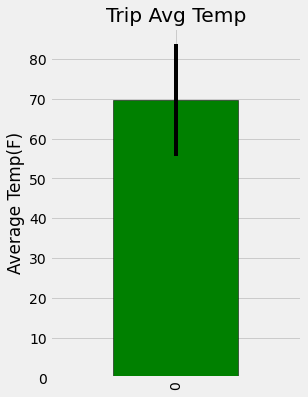

In [12]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

p_to_p = t_results.iloc[0]['t-max'] - t_results.iloc[0]['t-min']
y_val = t_results['t-avg']
y_val.plot(kind='bar',yerr=p_to_p, figsize=(4,6), color='green',edgecolor='black')
plt.title("Trip Avg Temp")
plt.ylabel('Average Temp(F)')
plt.show()

### Daily Rainfall Average

In [13]:
from sqlalchemy import inspect
inspector = inspect(engine)

In [14]:
#view columns for measurement
inspector.get_columns('measurement')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'date',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'prcp',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'tobs',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [15]:
#view columns for station
inspector.get_columns('station')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'station',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'latitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'longitude',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'elevation',
  'type': FLOAT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [16]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#creating list
listing = [
    Measurement.station, 
    func.sum(Measurement.prcp),
    Station.name, 
    Station.latitude, 
    Station.longitude,
    Station.elevation
]

# joining Measurement and Station by station to retrieve results
rainfall = session.query(*listing).filter(Measurement.station==Station.station).\
            filter(Measurement.date >= '2011-02-28').filter(Measurement.date <= '2011-03-05').\
            group_by(Measurement.station).\
            order_by(func.sum(Measurement.prcp).desc()).all()

rain_results = pd.DataFrame(rainfall, columns=['station','prcp','name', 'latitude', 'longitude', 'elevation'])

rain_results
            

,station,prcp,name,latitude,longitude,elevation
0,USC00518838,2.33,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
1,USC00519281,2.23,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00519523,2.19,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
3,USC00514830,1.96,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
4,USC00516128,1.45,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
5,USC00513117,1.44,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
6,USC00519397,1.38,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
7,USC00511918,0.63,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
8,USC00517948,NaN,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [17]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [81]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`



# Use the start and end date to create a range of dates

# Set the start and end date of the trip    

  
   # Strip off the year and save a list of strings in the format %m-%d

    

# Use the `daily_normals` function to calculate the normals for each date string    


   

 # and append the results to a list called `normals`.   







In [82]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index



In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


## Close Session